# EDA 실습
이 notebook에서는 COCO 형식의 annotation json 파일을 읽어들여, 각 레이블에 대한 갯수 정보, bbox 크기 정보들을 분석해보는 간단한 EDA의 예시를 보여줍니다.

단순하게는 각 폴더에 이미지들의 갯수나, 크기가 어떻게되는지 분석해보고, 더 나아가서 이전 수업들에서 배우고 체득하신 여러 노하우들을 녹여서 통찰력 있는 분석을 해보시면 좋겠습니다!

본 노트북 파일을 colab에서 진행하시는 경우 annotation json 파일과 dataset 을 colab 환경에서 읽을 수 있도록 mount 시키셔서 사용하시면 됩니다. 

실험하시는 서버 / 로컬 환경에서 진행하시는 경우, 본 노트북 파일을 다운받아 annotation json 파일과 dataset의 경로를 잘 설정하여 실행하시길 바랍니다.

* 노트북 다운로드 : 우측 상단 탭에서 파일 > 다운로드 > .ipynb 다운로드 

### table of contents
1. Load annotation file
2. Category eda 
3. Bbox area histogram for all classes
4. Bbox area histogram for each category classes
5. samples where bbox area < 2000

In [4]:
%matplotlib inline
import json
import os
from glob import glob

import matplotlib.pyplot as plt
from PIL import Image

import pandas as pd
import numpy as np
import seaborn

## 1. Load annotaion file
* 기존의 TACO dataset에서 각 annotaion 별로 bounding box를 crop 하여 image를 사용합니다.
* 현재 train, valid 는 28527, 4072 장이고, train_all(train, valid)는 32599장 입니다.
* 9 개의 class로 구성되어 있으며 각 class는 다음과 같습니다.
    * ['Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam',
    'Plastic bag', 'Battery', 'Clothing']

* data folder와 annotation json 파일이 존재하는 경로에 잘 지정했는지 확인해주시기 바랍니다.


In [5]:
train_data_path = "../input/data/train/*"
val_data_path = "../input/data/val/*" 
data_path_dict = {"train":train_data_path, "valid":val_data_path} 

## Insert your data_path
#anns_file_path = os.path.join(data_path, "annotations_train.json") ## Insert your annotation json path

#sub_dir = glob(data_path)
cat_dict = {}
for t in ["train", "valid"]:
    tmp_dict = {}
    sub_dir = glob(data_path_dict[t])
    for i in sub_dir:
        tmp_dict[os.path.basename(os.path.dirname(glob(f"{i}/**")[0]))] = len(glob(f"{i}/**"))
    cat_dict[f"{t}_category"] = tmp_dict

In [8]:
pd.DataFrame(cat_dict)

,train_category,valid_category
Styrofoam,1560,520
Paperpack,1458,486
Glass,1169,389
Paper,6895,2298
Plastic,3793,1264
Clothing,676,225
Battery,261,87
Plasticbag,6970,2323
Metal,1669,556


382.046875

### 데이터 메타정보
* annotations_train.json 에는 json 형태로 train, val 폴더에 존재하는 이미지들의 정보가 담겨있습니다.

In [11]:
categories = dataset["categories"]
annotations = dataset["annotations"]
images = dataset["images"]

df_cat = pd.DataFrame(categories)
df_ann = pd.DataFrame(annotations)
df_images = pd.DataFrame(images)

* categories : id, name, supercategory
  * id : category의 id (0 ~ 8)
  * name : category의 이름 총 9개
  * supercategory: category와 동일합니다.

In [ ]:
df_cat

,id,name,supercategory
0,0,Paper,Paper
1,1,Paperpack,Paperpack
2,2,Metal,Metal
3,3,Glass,Glass
4,4,Plastic,Plastic
5,5,Styrofoam,Styrofoam
6,6,Plasticbag,Plasticbag
7,7,Battery,Battery
8,8,Clothing,Clothing


* annotaions : id, image id, category id, segmentation, area, bbox, iscrowd
  * id : annotation id (0 ~ 48720). 한 Image에 한 annotation 만 존재하므로 image_id와 동일합니다.
  * image id : image_id (0 ~ 48720). 한 Image에 한 annotation 만 존재하므로 annotation id와 동일합니다.
  * bbox : crop하기 전 bounding box의 정보 (x, y, w, h)

In [12]:
df_ann

,id,image_id,category_id,bbox
0,0,0,6,"[3254.0, 1158.0, 572.0, 311.0]"
1,3,3,3,"[913.0, 1923.0, 921.0, 811.0]"
2,5,5,4,"[2055.0, 544.0, 580.0, 823.0]"
3,8,8,3,"[1833.0, 1353.0, 864.0, 1377.0]"
4,13,13,6,"[1359.0, 1669.0, 175.0, 289.0]"
...,...,...,...,...
32594,48716,48716,6,"[2546.0, 3651.0, 477.0, 380.0]"
32595,48717,48717,4,"[526.0, 2948.0, 82.0, 34.0]"
32596,48718,48718,4,"[0.0, 2987.0, 753.0, 1044.0]"
32597,48719,48719,4,"[653.0, 1040.0, 797.0, 370.0]"


* image : id, file_name
  * id : image id (0 ~ 48720)
  * file name : file_name (*.jpg)

In [ ]:
df_images

,id,file_name
0,0,000000.jpg
1,3,000003.jpg
2,5,000005.jpg
3,8,000008.jpg
4,13,000013.jpg
...,...,...
32594,48716,048716.jpg
32595,48717,048717.jpg
32596,48718,048718.jpg
32597,48719,048719.jpg


## 2. category EDA

* category : 9개

In [ ]:
df_cat.name.unique().shape[0]

9

In [ ]:
import seaborn as sns; sns.set()

# df_ann 의 category_id와 일치하는 df_cat의 id를 찾고 category 이름을 얻음
df_ann["category"] = df_ann.category_id.map(lambda x: df_cat.loc[df_cat.id == x, "name"].item())
cat_hist = df_ann["category"].value_counts().reset_index().rename(columns={"index" : "category_name", "category" : "number_of_annotations"})

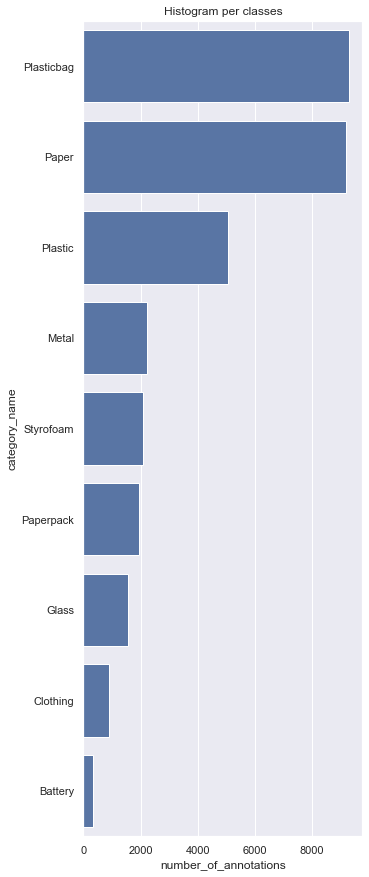

In [ ]:
plt.subplots(figsize=(5,15))
plt.title("Histogram per classes")
plot = sns.barplot(x="number_of_annotations", y="category_name",data=cat_hist,
            label="Total", color="b")

* 전체 9개 중 상위 4개 category가 전체의 약 80% 차지
* `["Plastic bag", "Paper", "Plastic" , "Metal"]`

In [ ]:
top_k = 4
cat_hist["ratio"] = cat_hist["number_of_annotations"] / cat_hist["number_of_annotations"].sum()
cat_hist.ratio.iloc[:top_k].sum()

0.7904843706862174

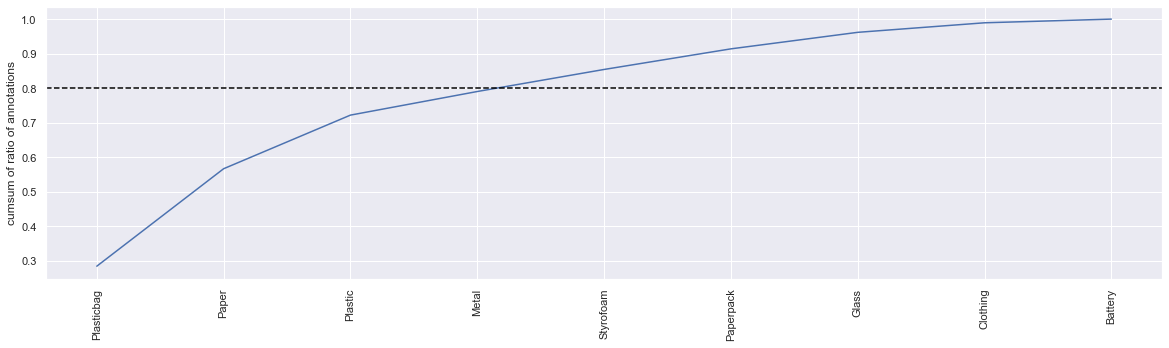

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(cat_hist["category_name"], cat_hist["ratio"].cumsum().values)
plt.axhline(0.8, linestyle="--", color="black", label="")
plt.ylabel("cumsum of ratio of annotations")
plt.xticks(rotation=90)
plt.show()

## 3. Bbox area histogram for all classes
* 전체 image의 size(bbox area) histogram

In [ ]:
df_ann["bbox_area"] = df_ann.bbox.map(lambda x: x[2] * x[3])

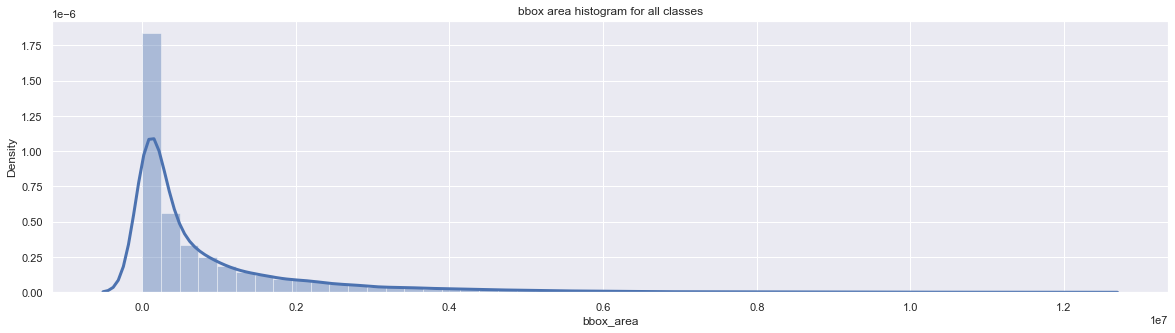

In [ ]:
plt.figure(figsize=(20, 5))
plt.title("bbox area histogram for all classes")
sns.distplot(df_ann["bbox_area"], bins=50, hist = True, kde = True, kde_kws = {'linewidth': 3})
plt.show()

## 4. Bbox area histogram for category classes
* category 별로 bbox_area 의 median이 큰순서로 정렬

In [ ]:
cat_median = df_ann.groupby("category").median()["bbox_area"].sort_values(ascending=False)

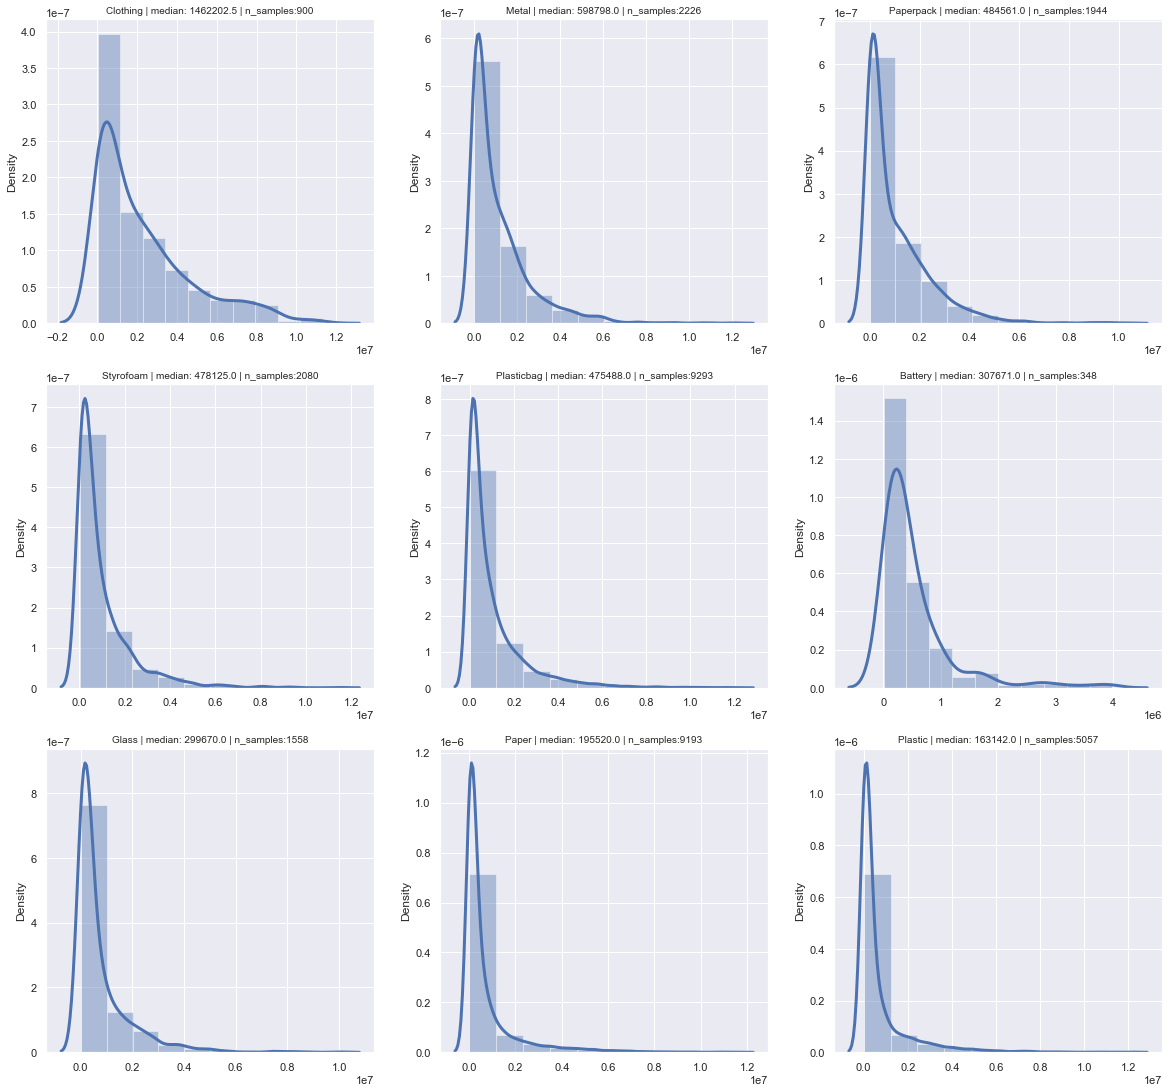

In [ ]:
n_cols = 3
width = 20
height = width // n_cols * len(cat_median) // n_cols + 1

fig, axes = plt.subplots(len(cat_median)//n_cols, n_cols, figsize=(width, height))
axes = np.ravel(axes)
for i, (cat, median) in enumerate(cat_median.items()):
    ax = axes[i]
    hist = df_ann.loc[df_ann.category == cat, ["bbox_area"]]
    ax.set_title(f"{cat} | median: {median} | n_samples:{len(hist)}", size=10)
    sns.distplot(hist, bins=10, hist = True, kde = True, kde_kws = {'linewidth': 3}, ax=ax)

## 4. Show images where bbox_are < 2000

In [ ]:
area_threshold = 2000
image_id_list = df_ann.loc[df_ann.bbox_area < area_threshold, "id"].values

In [ ]:
df_all = df_images.merge(df_ann[["id", "category", "bbox_area"]], on="id")

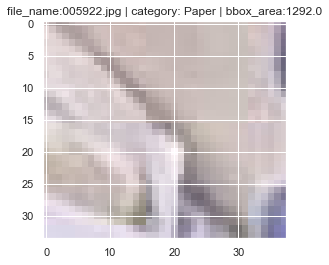

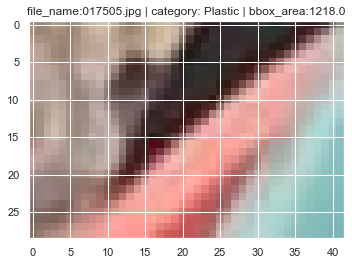

In [ ]:
for idx in np.random.choice(image_id_list, 2):
    
    df = df_all.loc[df_all.id == idx]
    category = df.category.item()
    file_name = df.file_name.item()
    bbox_area = df.bbox_area.item()

    if os.path.join(data_path, "train", category, file_name):
        file_path = os.path.join(data_path, "train", category, file_name)
    else:
        file_path = os.path.join(data_path, "val", category, file_name)

    I = Image.open(file_path)
    plt.title(f"file_name:{file_name} | category: {category} | bbox_area:{bbox_area}")
    plt.imshow(I)
    plt.show()
    